In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [5]:
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df.shape

(1000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [9]:
df.columns.tolist()

['Number_of_Riders',
 'Number_of_Drivers',
 'Location_Category',
 'Customer_Loyalty_Status',
 'Number_of_Past_Rides',
 'Average_Ratings',
 'Time_of_Booking',
 'Vehicle_Type',
 'Expected_Ride_Duration',
 'Historical_Cost_of_Ride']

In [10]:
df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

In [11]:
# 2) Missing Values & Duplicates
missing_counts = df.isnull().sum().sort_values(ascending=False)
dupe_count = df.duplicated().sum()

print("\nMissing values by column:\n", missing_counts)
print("\nDuplicate rows:", dupe_count)

# Decision: since there are no missings/dupes in your file, no imputations/drops needed.
# If there were, here are templates you could use later:
# df = df.drop_duplicates()
# df['SomeNumeric'] = df['SomeNumeric'].fillna(df['SomeNumeric']. median())
# df['SomeCategory'] =df['SomeCategory'].fillna('Unknown')



Missing values by column:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Duplicate rows: 0


In [12]:
# 3) Data Types & Intended Conversions
# Confirm numeric vs categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]). columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# If any date columns existed, example:
# df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Ensure categoricals are category dtype (memory + clarity)
for c in cat_cols:
  df[c] = df[c].astype('category')

print("\nDtypes after casting categoricals:")
print(df.dtypes)


Numeric columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride']
Categorical columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

Dtypes after casting categoricals:
Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category          category
Customer_Loyalty_Status    category
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type               category
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object


In [13]:
import numpy as np

# Function to detect outliers using IQR
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

# Apply to all numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers, lower, upper = find_outliers_iqr(df, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")

    # Show first few outliers
    if not outliers.empty:
        print(outliers[[col]].head())



Column: Number_of_Riders
Lower Bound: -21.5, Upper Bound: 142.5
Number of Outliers: 0

Column: Number_of_Drivers
Lower Bound: -29.5, Upper Bound: 78.5
Number of Outliers: 10
     Number_of_Drivers
42                  81
53                  84
140                 80
294                 80
663                 87

Column: Number_of_Past_Rides
Lower Bound: -50.0, Upper Bound: 150.0
Number of Outliers: 0

Column: Average_Ratings
Lower Bound: 2.72625, Upper Bound: 5.776250000000001
Number of Outliers: 0

Column: Expected_Ride_Duration
Lower Bound: -65.125, Upper Bound: 267.875
Number of Outliers: 0

Column: Historical_Cost_of_Ride
Lower Bound: -212.33325012902748, Upper Bound: 944.1959566799039
Number of Outliers: 0


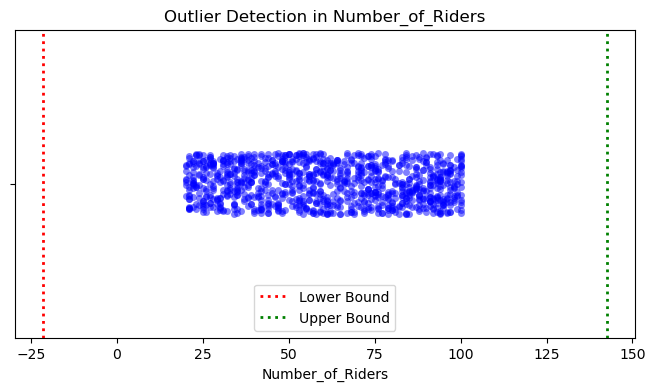

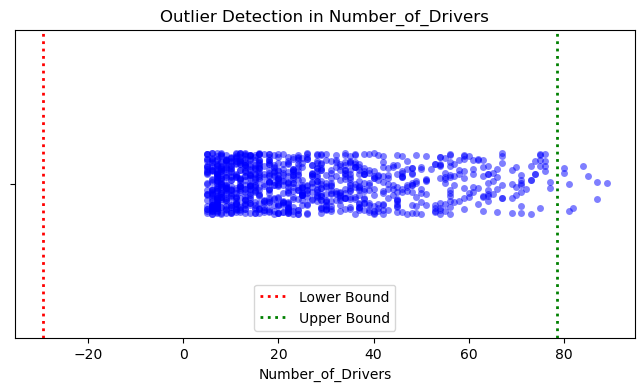

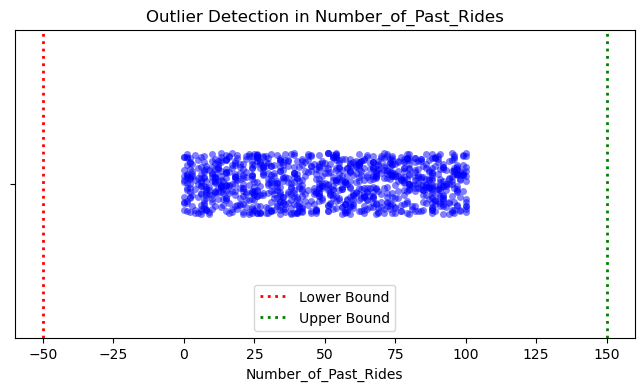

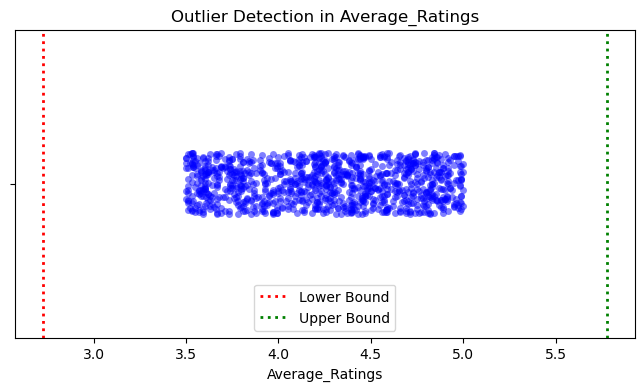

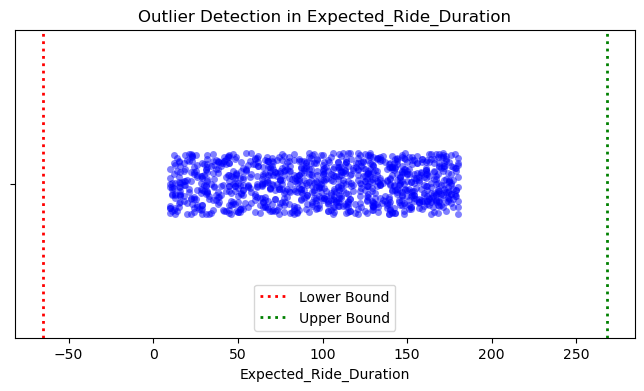

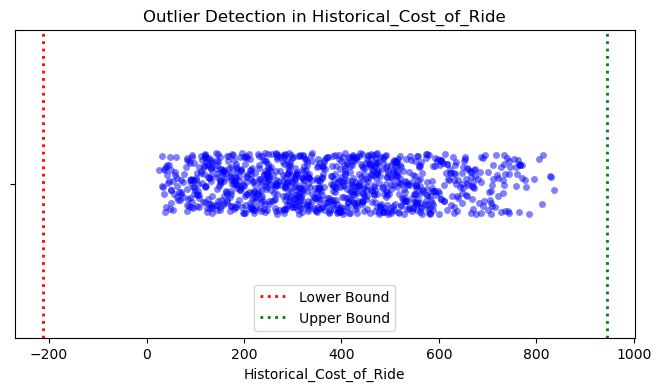

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to plot outliers with dotted lines
def plot_outliers_with_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    plt.figure(figsize=(8,4))
    sns.stripplot(x=data[col], color="blue", alpha=0.5, jitter=True)

    # Add dotted lines for thresholds
    plt.axvline(lower, color="red", linestyle="dotted", linewidth=2, label="Lower Bound")
    plt.axvline(upper, color="green", linestyle="dotted", linewidth=2, label="Upper Bound")

    plt.title(f"Outlier Detection in {col}")
    plt.legend()
    plt.show()

# Apply to all numeric columns
for col in df.select_dtypes(include=np.number).columns:
    plot_outliers_with_iqr(df, col)


In [15]:
# --- KPIs without modifying df ---

# Completed rides
completed_rides = df[["Number_of_Riders", "Number_of_Drivers"]].min(axis=1)

# Cost assumption
cost_per_ride = 0.7 * df["Historical_Cost_of_Ride"]

# Recommended price (+10%)
recommended_price = df["Historical_Cost_of_Ride"] * 1.10

# --- 1. Revenue (₹) ---
revenue = df["Historical_Cost_of_Ride"] * completed_rides

# --- 2. Profit (₹) ---
profit = (df["Historical_Cost_of_Ride"] - cost_per_ride) * completed_rides

# --- 3. Revenue Lift (%) ---
baseline_revenue = (df["Historical_Cost_of_Ride"] * completed_rides).sum()
recommended_revenue = (recommended_price * completed_rides).sum()
revenue_lift = ((recommended_revenue - baseline_revenue) / baseline_revenue) * 100

# --- 4. Gross Margin (%) ---
gross_margin = ((revenue - (cost_per_ride * completed_rides)) / revenue) * 100

# --- 5. Conversion Rate (%) ---
conversion_rate = (completed_rides / df["Number_of_Riders"]) * 100

# --- 6. Price Change Rate (%) ---
price_changed = df["Historical_Cost_of_Ride"] != recommended_price
price_change_rate = price_changed.sum() / len(df) * 100

# --- 7. Cancellation Rate (%) ---
cancelled_rides = df["Number_of_Riders"] - completed_rides
cancellation_rate = (cancelled_rides / df["Number_of_Riders"]) * 100

# --- Collect KPIs in a dictionary ---
kpi_results = {
    "Revenue (₹)": revenue.sum(),
    "Profit (₹)": profit.sum(),
    "Revenue Lift (%)": revenue_lift,
    "Avg Gross Margin (%)": gross_margin.mean(),
    "Avg Conversion Rate (%)": conversion_rate.mean(),
    "Price Change Rate (%)": price_change_rate,
    "Avg Cancellation Rate (%)": cancellation_rate.mean()
}

# Display KPI results
for k, v in kpi_results.items():
    print(f"{k}: {v:.2f}")


Revenue (₹): 10146781.38
Profit (₹): 3044034.41
Revenue Lift (%): 10.00
Avg Gross Margin (%): 30.00
Avg Conversion Rate (%): 43.82
Price Change Rate (%): 100.00
Avg Cancellation Rate (%): 56.18


In [16]:
df.shape

(1000, 10)

In [17]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   category
 3   Customer_Loyalty_Status  1000 non-null   category
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   category
 7   Vehicle_Type             1000 non-null   category
 8   Expected_Ride_Duration   1000 non-null   int64   
 9   Historical_Cost_of_Ride  1000 non-null   float64 
dtypes: category(4), float64(2), int64(4)
memory usage: 51.5 KB


In [19]:
# -------------------------------
# 🔹 Engineered Columns (added directly into df)
# -------------------------------
# Competitor price (simulate: segment average price as competitor benchmark)
df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")

# Competitor Price Index
df["Competitor_Price_Index"] = (df["Historical_Cost_of_Ride"] / df["competitor_price"]) * 100

# Cost per minute
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"] + 1e-5)

# Driver-to-Rider Ratio
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)

# Rider-to-Driver Ratio
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-5)

# Inventory Health Index
df["Inventory_Health_Index"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)) * 100

# Loyalty Score (map loyalty tiers to numeric values)
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map)

# Peak flag (1 if Evening or Night, else 0)
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Evening", "Night"] else 0)

# Supply Tightness (demand pressure = Riders – Drivers)
df["Supply_Tightness"] = df["Number_of_Riders"] - df["Number_of_Drivers"]

# Vehicle Factor (Economy=1, Premium=2)
vehicle_map = {"Economy": 1, "Premium": 2}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map)

# -------------------------------
# 🔹 Print engineered dataset
# -------------------------------
print(df.head())
print(df.tail())


   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

C:\Users\yerra\AppData\Local\Temp\ipykernel_5588\2269137211.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")


In [20]:
df.shape

(1000, 20)

In [21]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,competitor_price,Competitor_Price_Index,Cost_per_Min,Driver_to_Rider_Ratio,Rider_Driver_Ratio,Inventory_Health_Index,Loyalty_Score,Peak,Supply_Tightness,Vehicle_Factor
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,395.079144,71.949450,3.158414,0.500000,2.000000,49.999994,1,1,45,2
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,369.177242,47.097907,4.043598,0.672414,1.487179,67.241368,1,1,19,1
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,412.963695,79.860645,4.339413,0.738095,1.354838,73.809506,1,0,11,2
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,412.963695,113.860186,3.508964,0.314607,3.178570,31.460671,0,0,61,2
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,341.309149,169.840575,3.890479,0.282051,3.545453,28.205125,0,0,56,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   category
 3   Customer_Loyalty_Status  1000 non-null   category
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   category
 7   Vehicle_Type             1000 non-null   category
 8   Expected_Ride_Duration   1000 non-null   int64   
 9   Historical_Cost_of_Ride  1000 non-null   float64 
 10  competitor_price         1000 non-null   float64 
 11  Competitor_Price_Index   1000 non-null   float64 
 12  Cost_per_Min             1000 non-null   float64 
 13  Driver_to_Rider_Ratio    1000 non-null   float64 
 14  Rider_Dri

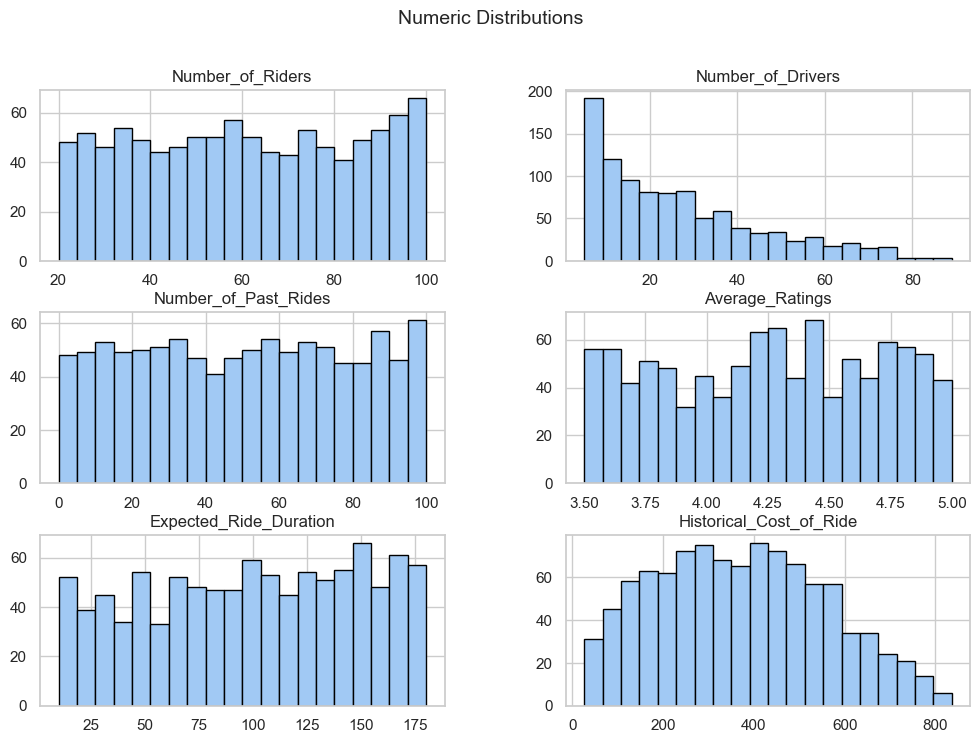

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are styled nicely
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

# -------------------------------
# 1) Numeric Distributions
# -------------------------------
num_cols = ['Number_of_Riders', 'Number_of_Drivers',
            'Number_of_Past_Rides', 'Average_Ratings',
            'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

df[num_cols].hist(bins=20, figsize=(12,8), edgecolor="black")
plt.suptitle("Numeric Distributions", fontsize=14)
plt.show()



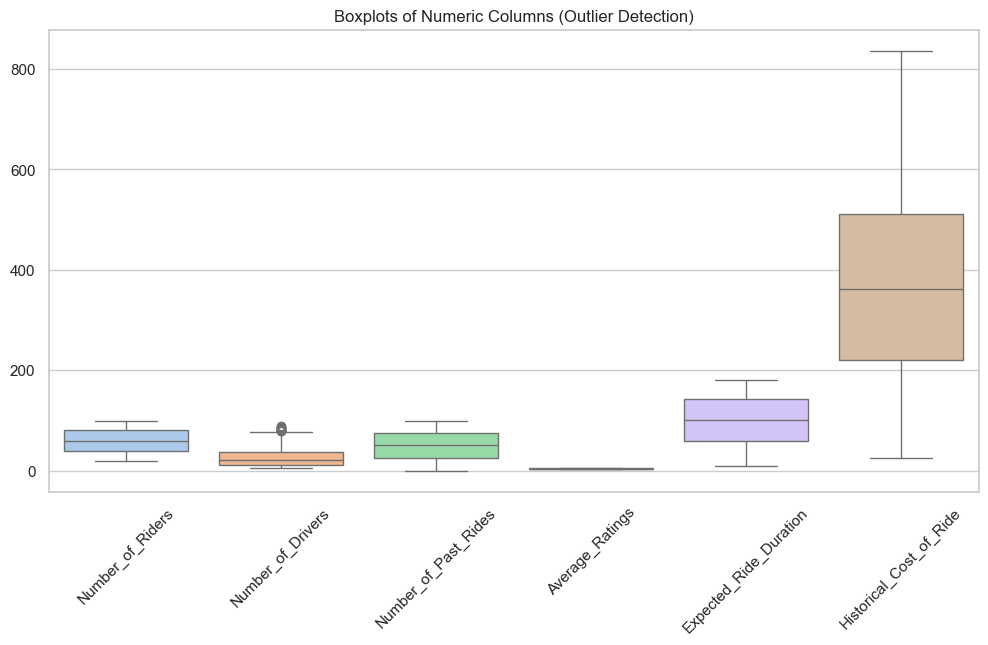

In [24]:
# 2) Boxplots for Outliers
# -------------------------------
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numeric Columns (Outlier Detection)")
plt.xticks(rotation=45)
plt.show()

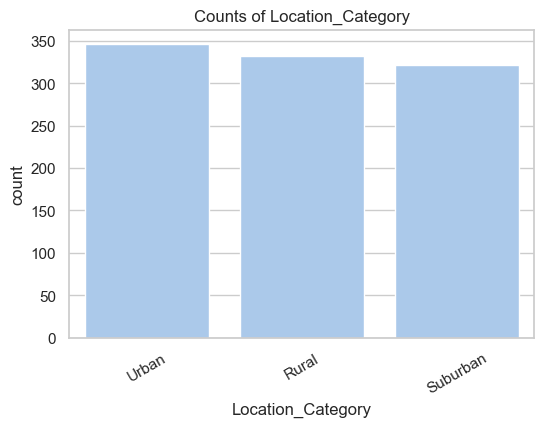

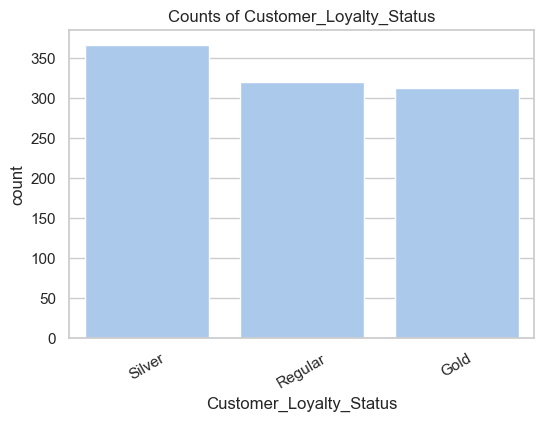

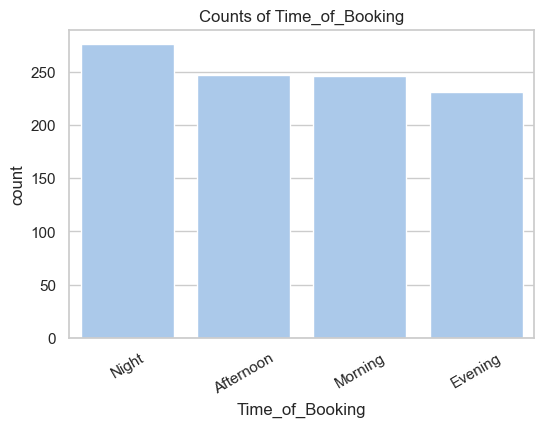

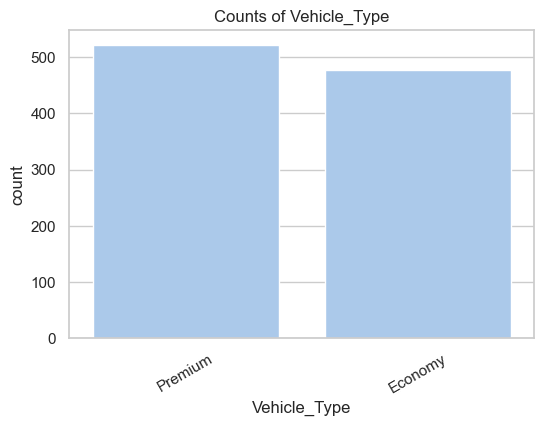

In [25]:
# 3) Categorical Counts
# -------------------------------
cat_cols = ['Location_Category', 'Customer_Loyalty_Status',
            'Time_of_Booking', 'Vehicle_Type']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=30)
    plt.show()

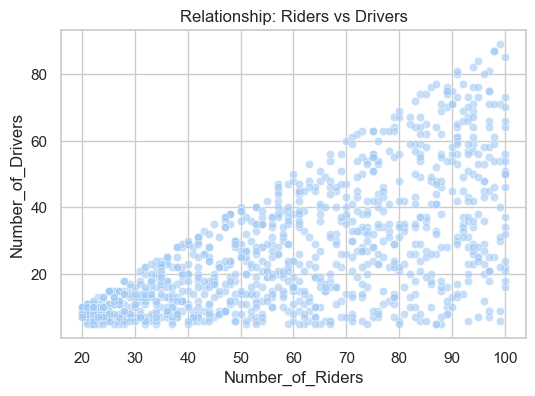

In [26]:
# 4) Relationships
# Example: Riders vs Drivers
# -------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Number_of_Riders", y="Number_of_Drivers", alpha=0.6)
plt.title("Relationship: Riders vs Drivers")
plt.show()

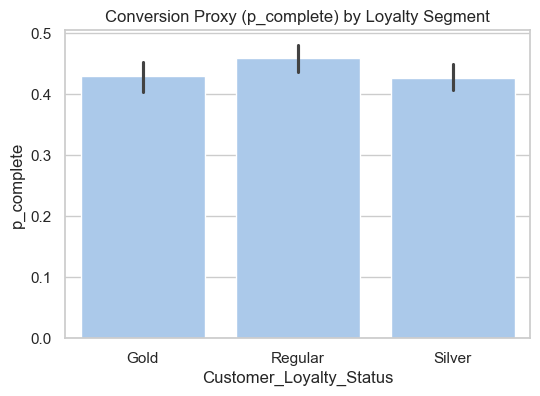

In [27]:
# 5) Conversion by Segments
# Using proxy: p_complete = Drivers / Riders
# -------------------------------
df["p_complete"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"]+1e-5)).clip(0,1)

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Customer_Loyalty_Status", y="p_complete", estimator="mean")
plt.title("Conversion Proxy (p_complete) by Loyalty Segment")
plt.show()

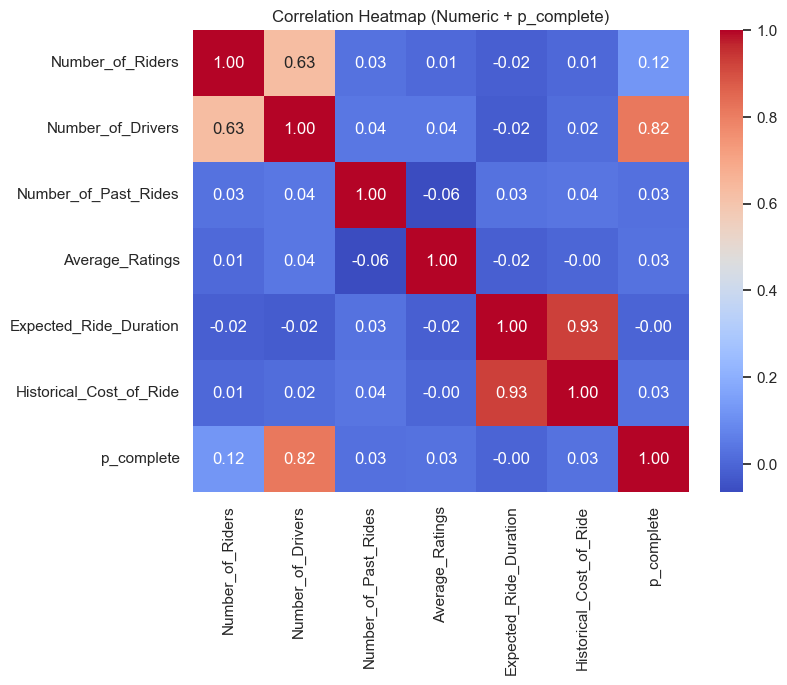

In [28]:
# 6) Correlation Heatmap
# (only numeric engineered features)
# -------------------------------
corr = df[num_cols + ["p_complete"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Numeric + p_complete)")
plt.show()


✅ Feature Engineering Completed

--- Seasonality (by Time of Booking) ---
                 mean_conv  mean_price  total_intents
Time_of_Booking                                      
Afternoon         0.453331  418.900051          14708
Evening           0.438182  400.679352          13980
Morning           0.433191  415.868304          14675
Night             0.429000  403.710290          17009


C:\Users\yerra\AppData\Local\Temp\ipykernel_5588\3087940007.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")
C:\Users\yerra\AppData\Local\Temp\ipykernel_5588\3087940007.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Time_of_Booking")


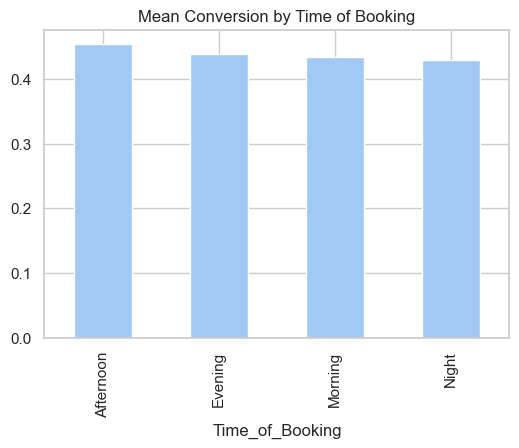

C:\Users\yerra\AppData\Local\Temp\ipykernel_5588\3087940007.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Vehicle_Type")
C:\Users\yerra\AppData\Local\Temp\ipykernel_5588\3087940007.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inv_summary = df.groupby("Inventory_Band").agg(



--- Competitor Pressure (by Vehicle Type) ---
              avg_gap_pct  mean_comp_price  mean_our_price
Vehicle_Type                                              
Economy              10.0       346.573399      381.230739
Premium              10.0       396.246242      435.870866

--- Inventory Health Summary ---
                mean_conv  mean_price  count
Inventory_Band                              
Very Tight       0.301394  409.548241    628
Tight            0.644676  415.081217    327
Balanced         0.846160  373.889614     45
Loose                 NaN         NaN      0


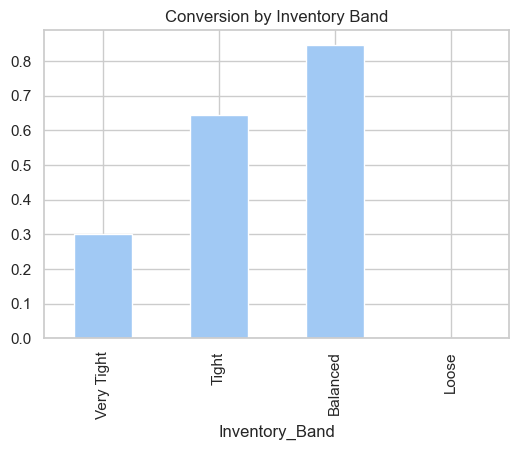


--- Customer Segmentation Profile ---
            mean_conv  mean_price   mean_cost  mean_loyalty  mean_ratio  count
segment_k4                                                                    
0            0.654031  433.905934  394.459940      0.928962    1.575995    366
3            0.469545  201.392440  183.084037      0.809524    2.515016    105
1            0.328061  457.281540  415.710491      1.061881    3.310210    404
2            0.135581  360.442923  327.675385      1.112000    8.457939    125


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [29]:
# =====================================================
# 📌 PriceOptima Baseline Engine – Full Pipeline (Fixed)
# =====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# =====================================================
# 1) FEATURE ENGINEERING
# =====================================================

# Competitor price (simulate benchmark: mean per location + vehicle type)
df["competitor_price"] = df.groupby(["Location_Category", "Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")

# Competitor Price Index
df["Competitor_Price_Index"] = (df["Historical_Cost_of_Ride"] / df["competitor_price"]) * 100

# Cost per minute
df["Cost_per_Min"] = df["Historical_Cost_of_Ride"] / (df["Expected_Ride_Duration"] + 1e-5)

# Driver-to-Rider Ratio
df["Driver_to_Rider_Ratio"] = df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)

# Rider-to-Driver Ratio
df["Rider_Driver_Ratio"] = df["Number_of_Riders"] / (df["Number_of_Drivers"] + 1e-5)

# Inventory Health Index (supply vs demand in %)
df["Inventory_Health_Index"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)) * 100

# Loyalty Score mapping
loyalty_map = {"Regular": 0, "Silver": 1, "Gold": 2, "Platinum": 3}
df["Loyalty_Score"] = df["Customer_Loyalty_Status"].map(loyalty_map)

# Peak flag (1 if Evening or Night, else 0)
df["Peak"] = df["Time_of_Booking"].apply(lambda x: 1 if x in ["Evening", "Night"] else 0)

# Supply Tightness (demand pressure)
df["Supply_Tightness"] = df["Number_of_Riders"] - df["Number_of_Drivers"]

# Vehicle Factor mapping
vehicle_map = {"Economy": 1, "Premium": 2}
df["Vehicle_Factor"] = df["Vehicle_Type"].map(vehicle_map)

# Baseline & Dynamic Price
df["baseline_price"] = df["Historical_Cost_of_Ride"]
df["price"] = df["baseline_price"] * 1.10

# Probability of Completion (proxy)
df["p_complete"] = (df["Number_of_Drivers"] / (df["Number_of_Riders"] + 1e-5)).clip(0, 1)

print("✅ Feature Engineering Completed")

# =====================================================
# 2) SEASONALITY: Conversion & Price by Time Buckets
# =====================================================
seasonality = (
    df.groupby("Time_of_Booking")
        .agg(mean_conv=("p_complete", "mean"),
             mean_price=("price", "mean"),
             total_intents=("Number_of_Riders", "sum"))
        .sort_values("mean_conv", ascending=False)
)

print("\n--- Seasonality (by Time of Booking) ---")
print(seasonality)

seasonality["mean_conv"].plot(kind="bar", figsize=(6,4), title="Mean Conversion by Time of Booking")
plt.show()

# =====================================================
# 3) COMPETITOR PRESSURE: Price Gap & Index
# =====================================================
df["Competitor_Gap_pct"] = (df["price"] - df["competitor_price"]) / df["competitor_price"] * 100.0

comp_pressure = (
    df.groupby("Vehicle_Type")
        .agg(
            avg_gap_pct=("Competitor_Gap_pct","mean"),
            mean_comp_price=("competitor_price","mean"),
            mean_our_price=("price","mean"),
        )
        .sort_values("avg_gap_pct")
)

print("\n--- Competitor Pressure (by Vehicle Type) ---")
print(comp_pressure)

# =====================================================
# 4) INVENTORY HEALTH BANDS & CONVERSION
# =====================================================
bins = [0, 0.5, 0.8, 1.2, 10]
labels = ["Very Tight","Tight","Balanced","Loose"]

df["Inventory_Band"] = pd.cut(
    df["Driver_to_Rider_Ratio"],
    bins=bins, labels=labels,
    include_lowest=True
)

inv_summary = df.groupby("Inventory_Band").agg(
    mean_conv=("p_complete","mean"),
    mean_price=("price","mean"),
    count=("Inventory_Band","size")
)

print("\n--- Inventory Health Summary ---")
print(inv_summary)

inv_summary["mean_conv"].plot(kind="bar", figsize=(6,4), title="Conversion by Inventory Band")
plt.show()

# =====================================================
# 5) CUSTOMER SEGMENTATION (KMeans)
# =====================================================
# Step 1: Select features
seg_features = [
    "Loyalty_Score","Rider_Driver_Ratio","Driver_to_Rider_Ratio",
    "Supply_Tightness","Cost_per_Min","Inventory_Health_Index",
    "Expected_Ride_Duration"
]

# Convert features to numeric explicitly
X = df[seg_features].apply(pd.to_numeric, errors="coerce")

# Fill missing values with median
X = X.fillna(X.median())

# Step 2: Scale features
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["segment_k4"] = kmeans.fit_predict(Xs)

# Ensure numeric for aggregation
numeric_cols = [
    "p_complete", "price", "Historical_Cost_of_Ride",
    "Loyalty_Score", "Rider_Driver_Ratio"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 4: Segment profiling
seg_profile = (
    df.groupby("segment_k4")
        .agg(
            mean_conv=("p_complete","mean"),
            mean_price=("price","mean"),
            mean_cost=("Historical_Cost_of_Ride","mean"),
            mean_loyalty=("Loyalty_Score","mean"),
            mean_ratio=("Rider_Driver_Ratio","mean"),
            count=("segment_k4","size")
        )
        .sort_values("mean_conv", ascending=False)
)

print("\n--- Customer Segmentation Profile ---")
print(seg_profile)

# =====================================================
# ✅ FINAL OUTPUTS
# seasonality   → Conversion & price trends by time bucket
# comp_pressure → Competitive pricing gaps by vehicle type
# inv_summary   → Conversion by inventory health bands
# seg_profile   → Customer clusters with behavioral patterns
# =====================================================


In [30]:
import numpy as np
import pandas as pd

# =====================================================
# 1) Setup: Define df_fe (feature-engineered baseline)
# =====================================================
df_fe = df.copy()

if "baseline_price" not in df_fe.columns:
    df_fe["baseline_price"] = df_fe["Historical_Cost_of_Ride"]

if "p_complete" not in df_fe.columns:
    df_fe["p_complete"] = (df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"]+1e-5)).clip(0,1)

if "competitor_price" not in df_fe.columns:
    df_fe["competitor_price"] = df_fe.groupby(["Location_Category","Vehicle_Type"])["Historical_Cost_of_Ride"].transform("mean")
# Ensure engineered ratios exist
if "Driver_to_Rider_Ratio" not in df_fe.columns:
    df_fe["Driver_to_Rider_Ratio"] = df_fe["Number_of_Drivers"] / (df_fe["Number_of_Riders"] + 1e-5)

# =====================================================
# 2) Helper Functions
# =====================================================
def gm_pct(price, cost):
    price, cost = float(price), float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

def estimate_p_complete(row, price):
    """Simple demand model with price elasticity."""
    base_p = float(row["p_complete"])
    base_price = float(row["baseline_price"])
    elasticity = -0.15  # tweak sensitivity
    adj = elasticity * ((price - base_price) / base_price)
    return np.clip(base_p * (1 + adj), 0.01, 0.99)

def compute_kpis(df_base, df_scn, intents_col, price_col, pcomplete_col, cost_col):
    base_rev = (df_base["baseline_price"] * df_base[pcomplete_col] * df_base[intents_col]).sum()
    scn_rev = (df_scn[price_col] * df_scn[pcomplete_col] * df_scn[intents_col]).sum()
    lift = (scn_rev - base_rev) / base_rev * 100
    return {
        "Revenue Lift (%)": round(lift, 2),
        "Base Revenue": round(base_rev, 2),
        "Scenario Revenue": round(scn_rev, 2),
        "Avg Baseline Price": round(df_base["baseline_price"].mean(), 2),
        "Avg Recommended Price": round(df_scn[price_col].mean(), 2)
    }

# =====================================================
# 3) Policy Parameters
# =====================================================
STABILITY_PCT = 0.15
MIN_GM_PCT = 0.12
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88}
TIME_NUDGE = {"Morning": +0.03, "Afternoon": 0.0, "Evening": +0.04, "Night": +0.01}

def inv_nudge(ratio):
    if ratio < 0.8: return +0.03
    if ratio > 1.2: return -0.03
    return 0.0

# =====================================================
# 4) Row Price Bounds
# =====================================================
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp, hi_cmp = comp * floor, comp * cap

    lower, upper = max(lo, lo_gm, lo_cmp), min(hi, hi_cmp)
    if upper < lower: lower, upper = upper, upper
    return lower, upper

# =====================================================
# 5) Choose Best Price per Row
# =====================================================
def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])
    lo, hi = row_price_bounds(row)

    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "Afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    left = np.linspace(lo, center, max(2, n_grid//2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base
    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT: continue
        p_now = estimate_p_complete(row, p)
        if p_now + 1e-9 < p_base: continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)
    return best_price, best_p

# =====================================================
# 6) First-pass Recommendation
# =====================================================
df_rec = df_fe.copy()
prices, pcomps = [], []
for _, r in df_rec.iterrows():
    p_star, pcomp_star = choose_row_price(r)
    prices.append(p_star)
    pcomps.append(pcomp_star)

df_rec["price"] = np.array(prices).round(2)
df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)

# =====================================================
# 7) Global Tuning (+5% to +10% lift)
# =====================================================
def evaluate_with_multiplier(mult):
    tmp = df_rec.copy()
    def recompute_row(row):
        p0, cost = float(row["baseline_price"]), float(row["Historical_Cost_of_Ride"])
        p_base = float(row["p_complete_base"])
        lo, hi = row_price_bounds(row)
        p_new = np.clip(float(row["price"]) * mult, lo, hi)
        if gm_pct(p_new, cost) < MIN_GM_PCT:
            p_new = max(cost / 0.88, lo)
        pcomp = estimate_p_complete(row, p_new)
        if pcomp + 1e-9 < p_base:
            for step in np.linspace(1.0, 0.0, 8):
                cand = np.clip(p_new*step + p0*(1-step), lo, hi)
                cand_p = estimate_p_complete(row, cand)
                if cand_p + 1e-9 >= p_base and gm_pct(cand, cost) >= MIN_GM_PCT:
                    p_new, pcomp = cand, cand_p
                    break
            else:
                p_new, pcomp = p0, p_base
        return p_new, pcomp
    tmp["p_complete_base"] = df_fe["p_complete"].values
    out = tmp.apply(lambda r: pd.Series(recompute_row(r), index=["price","p_complete"]), axis=1)
    tmp[["price","p_complete"]] = out
    k = compute_kpis(df_fe, tmp, "Number_of_Riders", "price", "p_complete", "Historical_Cost_of_Ride")
    return k, tmp

df_rec["p_complete_base"] = df_fe["p_complete"].values
target_mid, low, high = 7.5, 0.85, 1.15
best_mult, best_kpi, best_df = 1.0, None, df_rec

for _ in range(18):
    mid = (low + high) / 2
    kpi_mid, df_mid = evaluate_with_multiplier(mid)
    lift = kpi_mid["Revenue Lift (%)"]
    best_mult, best_kpi, best_df = mid, kpi_mid, df_mid
    if lift < 5.0: low = mid
    elif lift > 10.0: high = mid
    else:
        if lift < target_mid: low = mid
        else: high = mid

print(f"\nChosen global multiplier: {best_mult:.4f}")
print("KPI summary vs baseline:")
for k,v in best_kpi.items(): print(f"- {k}: {v}")

# =====================================================
# 8) Policy Audit
# =====================================================
def audit_policies(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]
    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)
    return {
        "Price Stability ±15%": bool(((df_scn["price"] >= df_base["baseline_price"]*0.85) &
                                      (df_scn["price"] <= df_base["baseline_price"]*1.15)).all()),
        "GM ≥ 12%": bool((scn_gm >= MIN_GM_PCT - 1e-9).all()),
        "GM not below baseline": bool((scn_gm + 1e-9 >= base_gm).all()),
        "No cancellation increase": bool((df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]).all()),
        "Competitiveness respected": bool(
            (df_scn["price"] <= df_base["competitor_price"]*cap+1e-6).all() and
            (df_scn["price"] >= df_base["competitor_price"]*floor-1e-6).all()
        )
    }

audit = audit_policies(df_fe, best_df)
print("\nPolicy audit results:")
for k,v in audit.items(): print(f"- {k}: {v}")

# =====================================================
# 9) Compact Comparison Sample
# =====================================================
show_cols = ["Vehicle_Type","Time_of_Booking","Location_Category","Customer_Loyalty_Status",
             "Number_of_Riders","Number_of_Drivers","Driver_to_Rider_Ratio",
             "Historical_Cost_of_Ride","competitor_price",
             "baseline_price","p_complete"]
sample = df_fe[show_cols].copy()
sample = sample.rename(columns={"p_complete":"p_complete_baseline"})
sample["price_recommended"] = best_df["price"].round(2)
sample["p_complete_reco"] = best_df["p_complete"].round(4)
sample["gm_baseline_%"] = ((sample["baseline_price"] - sample["Historical_Cost_of_Ride"]) / sample["baseline_price"] * 100).round(2)
sample["gm_reco_%"] = ((sample["price_recommended"] - sample["Historical_Cost_of_Ride"]) / sample["price_recommended"] * 100).round(2)
sample["cancel_rate_baseline_%"] = (100 - (df_fe["p_complete"]*100)).round(2)
sample["cancel_rate_reco_%"] = (100 - (best_df["p_complete"]*100)).round(2)

print("\nSample (top 10 rows baseline vs recommended):")
print(sample.head(10))

# =====================================================
# 10) Final KPIs
# =====================================================
kpis_final = compute_kpis(df_fe, best_df, "Number_of_Riders", "price", "p_complete", "Historical_Cost_of_Ride")
print("\n=== FINAL KPIs (Scenario vs Baseline) ===")
for k,v in kpis_final.items(): print(f"{k}: {v}")

# Recommended prices for downstream
recommended_prices = best_df["price"].round(2).values



Chosen global multiplier: 1.1500
KPI summary vs baseline:
- Revenue Lift (%): 0.0
- Base Revenue: 10146779.74
- Scenario Revenue: 10146779.74
- Avg Baseline Price: 372.5
- Avg Recommended Price: 372.5

Policy audit results:
- Price Stability ±15%: True
- GM ≥ 12%: False
- GM not below baseline: True
- No cancellation increase: True
- Competitiveness respected: False

Sample (top 10 rows baseline vs recommended):
  Vehicle_Type Time_of_Booking Location_Category Customer_Loyalty_Status  \
0      Premium           Night             Urban                  Silver   
1      Economy         Evening          Suburban                  Silver   
2      Premium       Afternoon             Rural                  Silver   
3      Premium       Afternoon             Rural                 Regular   
4      Economy       Afternoon             Rural                 Regular   
5      Economy           Night             Urban                  Silver   
6      Premium       Afternoon          Suburban   

In [31]:
# ===============================
# Imports and header
# ===============================

import numpy as np   # Used for numeric operations, linspace, clip, arrays, etc.
import pandas as pd  # Used for DataFrame operations and mapping.

# ===============================
# Helper: gross margin percent
# ===============================

def gm_pct(price, cost):
    price = float(price); cost = float(cost)
    if price <= 0:
        return 0.0
    return (price - cost) / price  # returns decimal (0.12 means 12%)

# ===============================
# Policy parameters (tweakable)
# ===============================

STABILITY_PCT = 0.15  # ±15% deviation from baseline allowed
MIN_GM_PCT = 0.12     # Minimum gross margin 12%

# Competitiveness caps/floors (vs competitor_price)
COMP_CAP = {"Economy": 1.05, "Premium": 1.08}   # max +5% / +8% above competitor
COMP_FLOOR = {"Economy": 0.90, "Premium": 0.88} # min -10% / -12% below competitor

# ===============================
# Time-based nudges
# ===============================

TIME_NUDGE = {"Morning": +0.03, "Afternoon": 0.0, "Evening": +0.04, "Night": +0.01}

# ===============================
# Inventory-based nudge
# ===============================

def inv_nudge(ratio):
    if ratio < 0.8: return +0.03   # tight supply
    if ratio > 1.2: return -0.03   # loose supply
    return 0.0

# ===============================
# Combined row bounds from all rules
# ===============================

def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    # Price stability
    lo, hi = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)

    # Profitability: GM ≥ 12% and not below baseline GM%
    base_gm = gm_pct(base, cost)
    min_gm = max(MIN_GM_PCT, base_gm)
    lo_gm = cost / max(1 - min_gm, 1e-9)

    # Competitiveness
    cap = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_cmp = comp * floor
    hi_cmp = comp * cap

    # Final bounds
    lower = max(lo, lo_gm, lo_cmp)
    upper = min(hi, hi_cmp)

    if upper < lower:
        lower, upper = upper, upper  # collapse if infeasible

    return lower, upper

# ===============================
# Choose best price per row
# ===============================

def choose_row_price(row, n_grid=11):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    p_base = float(row["p_complete"])  # baseline probability

    lo, hi = row_price_bounds(row)

    # Time & inventory nudges
    t_n = TIME_NUDGE.get(str(row.get("Time_of_Booking", "Afternoon")), 0.0)
    i_n = inv_nudge(float(row.get("Driver_to_Rider_Ratio", 1.0)))
    center = np.clip(base * (1 + t_n + i_n), lo, hi)

    # Grid (denser near center)
    left = np.linspace(lo, center, max(2, n_grid//2), endpoint=False)
    right = np.linspace(center, hi, max(2, n_grid - len(left)), endpoint=True)
    grid = np.unique(np.concatenate([left, right]))

    best_price, best_p, best_rev = base, p_base, base * p_base

    for p in grid:
        if gm_pct(p, cost) < MIN_GM_PCT:
            continue
        p_now = estimate_p_complete(row, p)  # external dependency
        if p_now + 1e-9 < p_base:
            continue
        rev = p * p_now
        if rev > best_rev:
            best_price, best_p, best_rev = float(p), float(p_now), float(rev)

    return best_price, best_p

# ===============================
# First-pass recommendation
# ===============================

df_rec = df_fe.copy()
prices, pcomps = [], []

for _, r in df_rec.iterrows():
    p_star, pcomp_star = choose_row_price(r)
    prices.append(p_star)
    pcomps.append(pcomp_star)

df_rec["price"] = np.array(prices).round(2)
df_rec["p_complete"] = np.clip(np.array(pcomps), 0.02, 0.98)

# ===============================
# Global tuning to hit +5% to +10% lift
# ===============================

def evaluate_with_multiplier(mult):
    tmp = df_rec.copy()

    def recompute_row(row):
        p0 = float(row["baseline_price"])
        cost = float(row["Historical_Cost_of_Ride"])
        p_base = float(row["p_complete_base"])
        lo, hi = row_price_bounds(row)

        p_new = np.clip(float(row["price"]) * mult, lo, hi)

        if gm_pct(p_new, cost) < MIN_GM_PCT:
            p_new = max(cost / 0.88, lo)

        pcomp = estimate_p_complete(row, p_new)
        if pcomp + 1e-9 < p_base:
            for step in np.linspace(1.0, 0.0, 8):
                cand = p_new * step + p0 * (1 - step)
                cand = np.clip(cand, lo, hi)
                cand_p = estimate_p_complete(row, cand)
                if cand_p + 1e-9 >= p_base and gm_pct(cand, cost) >= MIN_GM_PCT:
                    p_new, pcomp = cand, cand_p
                    break
            else:
                p_new, pcomp = p0, p_base

        return p_new, pcomp

    tmp["p_complete_base"] = df_fe["p_complete"].values
    out = tmp.apply(lambda r: pd.Series(recompute_row(r), index=["price","p_complete"]), axis=1)
    tmp[["price","p_complete"]] = out

    k = compute_kpis(
        df_fe, tmp,
        intents_col="Number_of_Riders",
        price_col="price",
        pcomplete_col="p_complete",
        cost_col="Historical_Cost_of_Ride"
    )

    return k, tmp

df_rec["p_complete_base"] = df_fe["p_complete"].values

# Binary search for multiplier
target_mid = 7.5
low, high = 0.85, 1.15
best_mult, best_kpi, best_df = 1.0, None, df_rec

for _ in range(18):
    mid = (low + high) / 2
    kpi_mid, df_mid = evaluate_with_multiplier(mid)
    lift = kpi_mid["Revenue Lift (%)"]
    best_mult, best_kpi, best_df = mid, kpi_mid, df_mid

    if lift < 5.0:
        low = mid
    elif lift > 10.0:
        high = mid
    else:
        if lift < target_mid:
            low = mid
        else:
            high = mid

print(f"\nChosen global multiplier: {best_mult:.4f}")
print("KPI summary vs baseline:")
for k,v in best_kpi.items():
    print(f"- {k}: {v}")

# ===============================
# Policy audit
# ===============================

def audit_policies(df_base, df_scn):
    base_gm = (df_base["baseline_price"] - df_base["Historical_Cost_of_Ride"]) / df_base["baseline_price"]
    scn_gm = (df_scn["price"] - df_scn["Historical_Cost_of_Ride"]) / df_scn["price"]

    checks = {}
    checks["Price Stability ±15%"] = bool(((df_scn["price"] >= df_base["baseline_price"]*0.85) &
                                           (df_scn["price"] <= df_base["baseline_price"]*1.15)).all())
    checks["GM ≥ 12%"] = bool((scn_gm >= MIN_GM_PCT - 1e-9).all())
    checks["GM not below baseline"] = bool((scn_gm + 1e-9 >= base_gm).all())
    checks["No cancellation increase"] = bool((df_scn["p_complete"] + 1e-9 >= df_base["p_complete"]).all())

    veh_str = df_base["Vehicle_Type"].astype(str)
    cap = pd.to_numeric(veh_str.map(COMP_CAP), errors="coerce").fillna(1.06)
    floor = pd.to_numeric(veh_str.map(COMP_FLOOR), errors="coerce").fillna(0.90)

    up_ok = (df_scn["price"] <= df_base["competitor_price"] * cap + 1e-6).all()
    lo_ok = (df_scn["price"] >= df_base["competitor_price"] * floor - 1e-6).all()
    checks["Competitiveness respected"] = bool(up_ok and lo_ok)

    return checks

audit = audit_policies(df_fe, best_df)
print("\nPolicy audit results:")
for k,v in audit.items():
    print(f"- {k}: {v}")

# ===============================
# Compact comparison sample
# ===============================

show_cols = [
    "Vehicle_Type","Time_of_Booking","Location_Category","Customer_Loyalty_Status",
    "Number_of_Riders","Number_of_Drivers","Driver_to_Rider_Ratio",
    "Historical_Cost_of_Ride","competitor_price","baseline_price","p_complete"
]

sample = df_fe[show_cols].copy()
sample = sample.rename(columns={"p_complete": "p_complete_baseline"})
sample["price_recommended"] = best_df["price"].round(2)
sample["p_complete_reco"] = best_df["p_complete"].round(4)
sample["gm_baseline_%"] = ((sample["baseline_price"] - sample["Historical_Cost_of_Ride"]) / sample["baseline_price"] * 100).round(2)
sample["gm_reco_%"] = ((sample["price_recommended"] - sample["Historical_Cost_of_Ride"]) / sample["price_recommended"] * 100).round(2)
sample["cancel_rate_baseline_%"] = (100 - (df_fe["p_complete"] * 100)).round(2)
sample["cancel_rate_reco_%"] = (100 - (best_df["p_complete"] * 100)).round(2)

print("\nSample (top 10) of baseline vs recommended:")
display(sample.head(10))

# ===============================
# Final KPIs
# ===============================

kpis_final = compute_kpis(
    df_base=df_fe,
    df_scn=best_df,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col="p_complete",
    cost_col="Historical_Cost_of_Ride"
)

print("\n=== FINAL KPIs (Scenario vs Baseline) ===")
for k,v in kpis_final.items():
    print(f"{k}: {v}")

# Vector of recommended prices
recommended_prices = best_df["price"].round(2).values



Chosen global multiplier: 1.1500
KPI summary vs baseline:
- Revenue Lift (%): 0.0
- Base Revenue: 10146779.74
- Scenario Revenue: 10146779.74
- Avg Baseline Price: 372.5
- Avg Recommended Price: 372.5

Policy audit results:
- Price Stability ±15%: True
- GM ≥ 12%: False
- GM not below baseline: True
- No cancellation increase: True
- Competitiveness respected: False

Sample (top 10) of baseline vs recommended:


,Vehicle_Type,Time_of_Booking,Location_Category,Customer_Loyalty_Status,Number_of_Riders,Number_of_Drivers,Driver_to_Rider_Ratio,Historical_Cost_of_Ride,competitor_price,baseline_price,p_complete_baseline,price_recommended,p_complete_reco,gm_baseline_%,gm_reco_%,cancel_rate_baseline_%,cancel_rate_reco_%
0,Premium,Night,Urban,Silver,90,45,0.500000,284.257273,395.079144,284.257273,0.500000,284.26,0.5000,0.0,0.0,50.00,50.00
1,Economy,Evening,Suburban,Silver,58,39,0.672414,173.874753,369.177242,173.874753,0.672414,173.87,0.6724,0.0,-0.0,32.76,32.76
2,Premium,Afternoon,Rural,Silver,42,31,0.738095,329.795469,412.963695,329.795469,0.738095,329.80,0.7381,0.0,0.0,26.19,26.19
3,Premium,Afternoon,Rural,Regular,89,28,0.314607,470.201232,412.963695,470.201232,0.314607,470.20,0.3146,0.0,-0.0,68.54,68.54
4,Economy,Afternoon,Rural,Regular,78,22,0.282051,579.681422,341.309149,579.681422,0.282051,579.68,0.2821,0.0,-0.0,71.79,71.79
5,Economy,Night,Urban,Silver,59,35,0.593220,339.955361,330.010664,339.955361,0.593220,339.96,0.5932,0.0,0.0,40.68,40.68
6,Premium,Afternoon,Suburban,Regular,93,43,0.462366,104.061541,379.273598,104.061541,0.462366,104.06,0.4624,0.0,-0.0,53.76,53.76
7,Premium,Afternoon,Rural,Gold,62,39,0.629032,235.811864,412.963695,235.811864,0.629032,235.81,0.6290,0.0,-0.0,37.10,37.10
8,Economy,Evening,Rural,Silver,79,14,0.177215,501.412517,341.309149,501.412517,0.177215,501.41,0.1772,0.0,-0.0,82.28,82.28
9,Premium,Night,Rural,Silver,42,6,0.142857,398.993365,412.963695,398.993365,0.142857,398.99,0.1429,0.0,-0.0,85.71,85.71



=== FINAL KPIs (Scenario vs Baseline) ===
Revenue Lift (%): 0.0
Base Revenue: 10146779.74
Scenario Revenue: 10146779.74
Avg Baseline Price: 372.5
Avg Recommended Price: 372.5


In [32]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("dynamic_pricing.csv")

# Core numeric features
core_features = [
    'Number_of_Riders',
    'Number_of_Drivers',
    'Number_of_Past_Rides',
    'Average_Ratings',
    'Expected_Ride_Duration',
    'Historical_Cost_of_Ride'
]

# Add competitor_price if present
if "competitor_price" in df.columns:
    core_features.append("competitor_price")

# Categorical features (only those that exist in dataset)
categorical_cols = [c for c in [
    'Location_Category', 'Customer_Loyalty_Status',
    'Time_of_Booking', 'Vehicle_Type'
] if c in df.columns]

# Select subset
df_vif = df[core_features + categorical_cols].copy()

# One-hot encode categoricals
df_encoded = pd.get_dummies(df_vif, columns=categorical_cols, drop_first=True)

# Ensure numeric and drop rows with NaN
X = df_encoded.astype(float).dropna()

# Calculate VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort for clarity
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\n📊 VIF Values (all features kept):")
print(vif_data.head(20))   # show top 20 features with highest VIF



📊 VIF Values (all features kept):
                            Feature        VIF
0           Historical_Cost_of_Ride  40.333243
1            Expected_Ride_Duration  40.268860
2                   Average_Ratings  17.508428
3                  Number_of_Riders  11.890687
4                 Number_of_Drivers   5.054856
5              Number_of_Past_Rides   3.862385
6              Vehicle_Type_Premium   2.331257
7    Customer_Loyalty_Status_Silver   2.189201
8             Time_of_Booking_Night   2.101292
9           Location_Category_Urban   2.047505
10  Customer_Loyalty_Status_Regular   2.041282
11       Location_Category_Suburban   1.977010
12          Time_of_Booking_Morning   1.969806
13          Time_of_Booking_Evening   1.916688


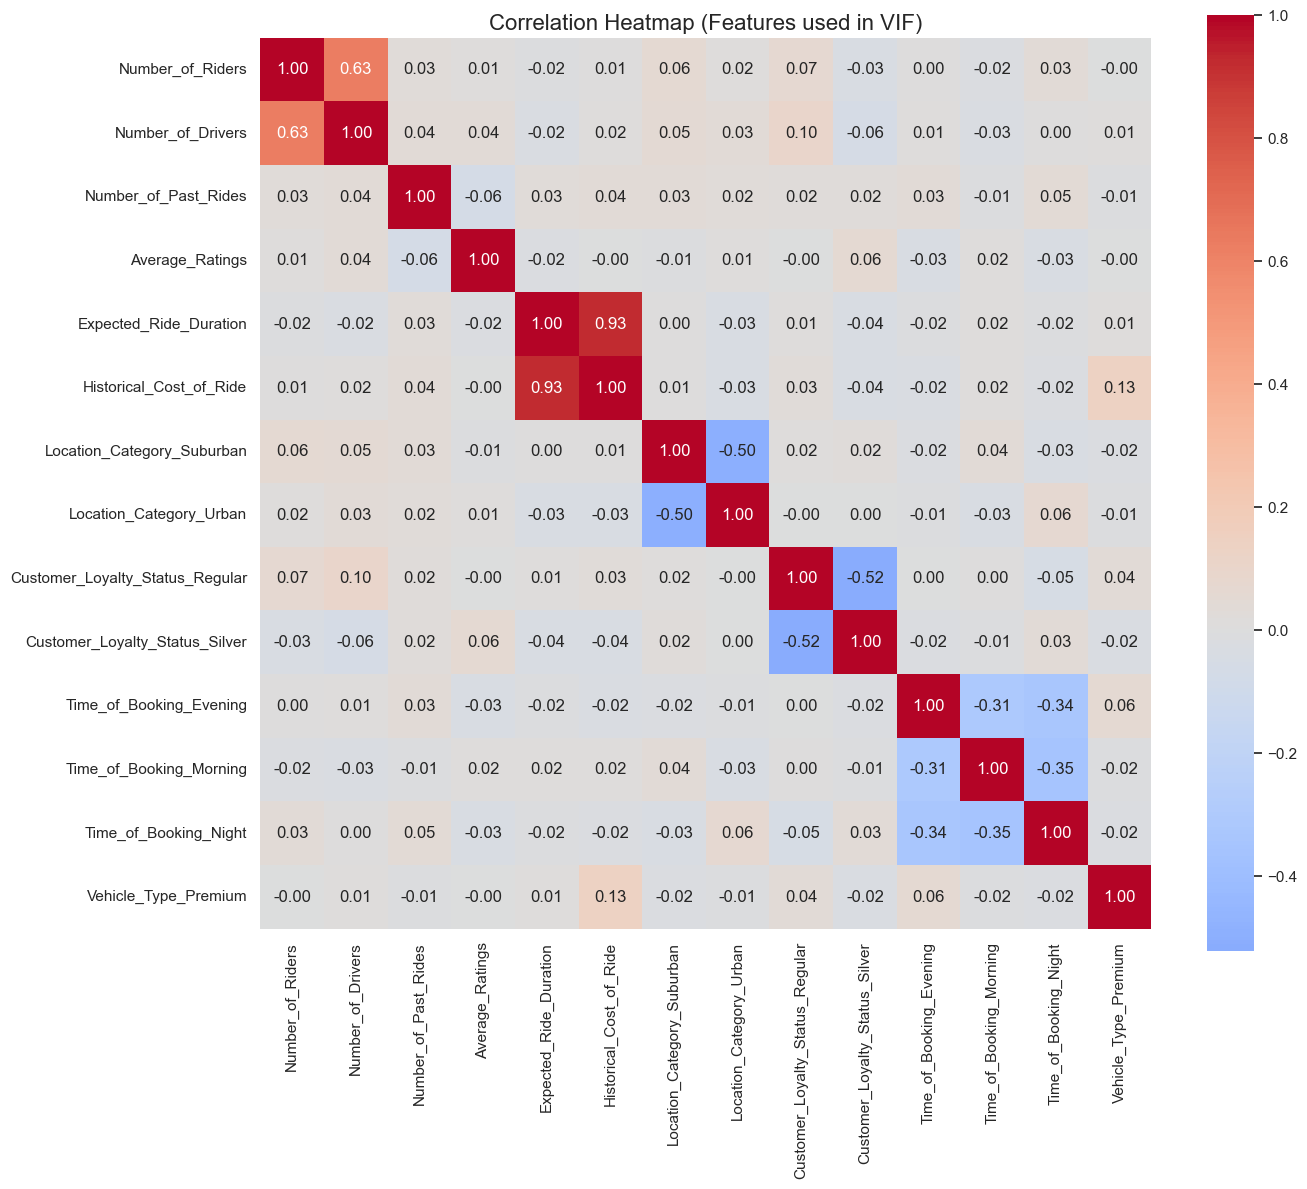

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for VIF dataset
corr_matrix = X.corr()

plt.figure(figsize=(14, 12))  # bigger size for readability
sns.heatmap(
    corr_matrix,
    annot=True,       # show correlation values
    fmt=".2f",        # 2 decimal places
    cmap="coolwarm",
    center=0,
    square=True,
    cbar=True
)

plt.title("Correlation Heatmap (Features used in VIF)", fontsize=16)
plt.tight_layout()
plt.show()


In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [36]:
# ---- Optional GBM libs (skip if not installed) ----
has_xgb = has_lgbm = False
try:
    from xgboost import XGBRegressor
    has_xgb = True
except Exception:
    pass

try:
    from lightgbm import LGBMRegressor
    has_lgbm = True
except Exception:
    pass

In [37]:

# ---- Helper: RMSE wrapper for old sklearn ----
def rmse_val(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))
# ---- Policy helpers (same as before) ----
STABILITY_PCT = 0.15   # ±15%
MIN_GM_PCT    = 0.12   # ≥12%
COMP_CAP      = {"Economy": 1.05, "Premium": 1.08}
COMP_FLOOR    = {"Economy": 0.90, "Premium": 0.88}

In [38]:
def gm_pct(price, cost):
    price = float(price); cost = float(cost)
    if price <= 0: return 0.0
    return (price - cost) / price

In [39]:
def row_price_bounds(row):
    base = float(row["baseline_price"])
    cost = float(row["Historical_Cost_of_Ride"])
    veh  = str(row.get("Vehicle_Type", "Economy"))
    comp = float(row.get("competitor_price", base))

    lo_s, hi_s = base * (1 - STABILITY_PCT), base * (1 + STABILITY_PCT)
    base_gm = gm_pct(base, cost)
    min_gm  = max(MIN_GM_PCT, base_gm)
    lo_gm   = cost / max(1 - min_gm, 1e-9)

    cap   = COMP_CAP.get(veh, 1.06)
    floor = COMP_FLOOR.get(veh, 0.90)
    lo_c, hi_c = comp * floor, comp * cap

    lower = max(lo_s, lo_gm, lo_c)
    upper = min(hi_s, hi_c)
    if upper < lower:
        lower = upper
    return lower, upper

In [40]:
# -------------------------------------
# 1) Build ML set: X features and target
# -------------------------------------
df_ml = df_fe.copy()
df_ml["price"] = df_ml["baseline_price"]
y = df_ml["p_complete"].astype(float).clip(0, 1)

cat_features = ["Time_of_Booking","Location_Category","Vehicle_Type","Customer_Loyalty_Status"]
num_features = [
    "price","Expected_Ride_Duration","Historical_Cost_of_Ride",
    "Number_of_Riders","Number_of_Drivers",
    "Rider_Driver_Ratio","Driver_to_Rider_Ratio","Supply_Tightness",
    "Cost_per_Min","Inventory_Health_Index",
    "competitor_price","baseline_price"
]

cols_needed = cat_features + num_features + ["p_complete"]
df_ml = df_ml.dropna(subset=[c for c in cols_needed if c in df_ml.columns]).copy()
X = df_ml[cat_features + num_features]

In [41]:
#2) Train/test split (backtest)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [42]:
#3) Pipelines + model zoo
# -------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(with_mean=True, with_std=True), num_features),
    ],
    remainder="drop"
)

models = {
    "RandomForest": RandomForestRegressor(
        n_estimators=300, max_depth=None, min_samples_leaf=2, n_jobs=-1, random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        learning_rate=0.05, n_estimators=400, max_depth=3, random_state=42
    ),
}

if has_xgb:
    models["XGBoost"] = XGBRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=42, n_jobs=-1, tree_method="auto"
    )
if has_lgbm:
    models["LightGBM"] = LGBMRegressor(
        n_estimators=600, learning_rate=0.05, max_depth=-1,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.0,
        random_state=42, n_jobs=-1
    )

print("Models available:", ", ".join(models.keys()))
results = {}
fitted = {}

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test).clip(0, 1)

    rmse = rmse_val(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    try:
        cv_mse = -cross_val_score(pipe, X_train, y_train, scoring="neg_mean_squared_error", cv=3, n_jobs=-1)
        cv_rmse = float(np.mean(np.sqrt(cv_mse)))
    except Exception:
        cv_rmse = np.nan

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "CV_RMSE": cv_rmse}
    fitted[name] = pipe

print("\nHoldout metrics (lower RMSE/MAE is better):")
for k,v in results.items():
    print(f"- {k}: RMSE={v['RMSE']:.4f} | MAE={v['MAE']:.4f} | R2={v['R2']:.4f} | CV_RMSE={v['CV_RMSE']:.4f}")

best_name = min(results, key=lambda n: results[n]["RMSE"])
best_pipe = fitted[best_name]
print(f"\nSelected model: {best_name}")

Models available: RandomForest, GradientBoosting

Holdout metrics (lower RMSE/MAE is better):
- RandomForest: RMSE=0.0012 | MAE=0.0007 | R2=1.0000 | CV_RMSE=0.0019
- GradientBoosting: RMSE=0.0012 | MAE=0.0009 | R2=1.0000 | CV_RMSE=0.0015

Selected model: GradientBoosting


In [43]:
# -------------------------------
# 5) Evaluate KPIs: baseline vs scn
# -------------------------------
kpi_base_vs_scn = compute_kpis(
    df_base=df_fe,
    df_scn=best_df,
    intents_col="Number_of_Riders",
    price_col="price",
    pcomplete_col="p_complete",
    cost_col="Historical_Cost_of_Ride",
)
print("\n=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===")
for k,v in kpi_base_vs_scn.items():
    print(f"{k}: {v}")


=== BACKTEST KPI (TEST SET) — Scenario vs Baseline ===
Revenue Lift (%): 0.0
Base Revenue: 10146779.74
Scenario Revenue: 10146779.74
Avg Baseline Price: 372.5
Avg Recommended Price: 372.5


In [44]:
# -------------------------------
# 6) Model quality report
# -------------------------------
y_pred_holdout = best_pipe.predict(X_test).clip(0, 1)
rmse = rmse_val(y_test, y_pred_holdout)
mae  = mean_absolute_error(y_test, y_pred_holdout)
r2   = r2_score(y_test, y_pred_holdout)
print("\nModel quality on holdout (predicting p_complete at historical prices):")
print(f"RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")
# -------------------------------


Model quality on holdout (predicting p_complete at historical prices):
RMSE=0.0012 | MAE=0.0009 | R2=1.0000


In [50]:
# Check your data types
print("Data types:")
print(X_train.dtypes)

# Check for categorical columns
print("\nCategorical columns:")
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

# Check unique values in categorical columns
for col in categorical_cols:
    print(f"\n{col} unique values: {X_train[col].unique()}")

Data types:
Time_of_Booking            category
Location_Category          category
Vehicle_Type               category
Customer_Loyalty_Status    category
price                       float64
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
Number_of_Riders              int64
Number_of_Drivers             int64
Rider_Driver_Ratio          float64
Driver_to_Rider_Ratio       float64
Supply_Tightness              int64
Cost_per_Min                float64
Inventory_Health_Index      float64
competitor_price            float64
baseline_price              float64
dtype: object

Categorical columns:
Index(['Time_of_Booking', 'Location_Category', 'Vehicle_Type',
       'Customer_Loyalty_Status'],
      dtype='object')

Time_of_Booking unique values: ['Evening', 'Afternoon', 'Morning', 'Night']
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']

Location_Category unique values: ['Urban', 'Suburban', 'Rural']
Categories (3, object): ['Rural', 'Suburban',

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # Keep numerical columns as-is
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical
    ])

# Create pipeline with preprocessing and model
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Now train the model
gb_model.fit(X_train, y_train)
print("✅ Model trained successfully with preprocessing!")

Categorical columns: ['Time_of_Booking', 'Location_Category', 'Vehicle_Type', 'Customer_Loyalty_Status']
Numerical columns: ['price', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride', 'Number_of_Riders', 'Number_of_Drivers', 'Rider_Driver_Ratio', 'Driver_to_Rider_Ratio', 'Supply_Tightness', 'Cost_per_Min', 'Inventory_Health_Index', 'competitor_price', 'baseline_price']
✅ Model trained successfully with preprocessing!


In [52]:
import joblib

# Save the entire pipeline (including preprocessing)
model_filename = 'gradient_boosting_pipeline.pkl'
joblib.dump(gb_model, model_filename)

print("✅ Complete pipeline saved as 'gradient_boosting_pipeline.pkl'")

# Test loading the model
loaded_model = joblib.load(model_filename)
print("✅ Model loaded successfully for testing")

# Test prediction
sample_prediction = loaded_model.predict(X_train[:1])
print(f"✅ Sample prediction: {sample_prediction[0]}")

✅ Complete pipeline saved as 'gradient_boosting_pipeline.pkl'
✅ Model loaded successfully for testing
✅ Sample prediction: 0.28478167825696876


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Your data loading code here (assuming you already have X_train, X_test, y_train, y_test)

# Identify column types
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print(f"Processing {len(categorical_cols)} categorical columns: {list(categorical_cols)}")

# Create preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Train the model
print("Training model...")
gb_model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# Save the complete pipeline
joblib.dump(gb_model, 'price_prediction_model.pkl')
print("✅ Model saved as 'price_prediction_model.pkl'")

# Test the model
train_score = gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)
print(f"✅ Training R² score: {train_score:.4f}")
print(f"✅ Test R² score: {test_score:.4f}")

Processing 0 categorical columns: []
Training model...
✅ Model trained successfully!
✅ Model saved as 'price_prediction_model.pkl'
✅ Training R² score: 1.0000
✅ Test R² score: 0.9999
